In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
import cartopy
import cartopy.crs as ccrs
import os

In [2]:
CAPACITY_PATH = '/usr/people/most/01_ICEVEPS/input/capacities/2023Output/'
offwind = xr.open_dataset(os.path.join(CAPACITY_PATH, 'offwind_cap2023_LENTISgrid.nc'))
onwind = xr.open_dataset(os.path.join(CAPACITY_PATH, 'onwind_cap2023_LENTISgrid.nc'))
solar = xr.open_dataset(os.path.join(CAPACITY_PATH, 'solar_cap2023_LENTISgrid.nc'))
ror = xr.open_dataset(os.path.join(CAPACITY_PATH, 'run-of-river_from_jrc_estH_2023_2.nc'))
reservoir = xr.open_dataset(os.path.join(CAPACITY_PATH, 'reservoir_from_jrc_estH_2023_2.nc'))

In [3]:
total_windCAP = onwind.CAP.where(~np.isnan(onwind.CAP), 0) + offwind.CAP.where(~np.isnan(offwind.CAP), 0)
total_renewable = total_windCAP + solar.CAP.where(~np.isnan(solar.CAP), 0) + ror.capacity.where(~np.isnan(ror.capacity), 0) + reservoir.capacity.where(~np.isnan(reservoir.capacity), 0)
total_windCAP = total_windCAP.where(total_windCAP != 0, np.nan)
total_renewable = total_renewable.where(total_renewable != 0, np.nan)
total_renewable

<xarray.DataArray (lat: 0, lon: 4)>
array([], shape=(0, 4), dtype=float64)
Coordinates:
  * lon      (lon) float64 -11.25 11.25 33.75 56.25
  * lat      (lat) float64

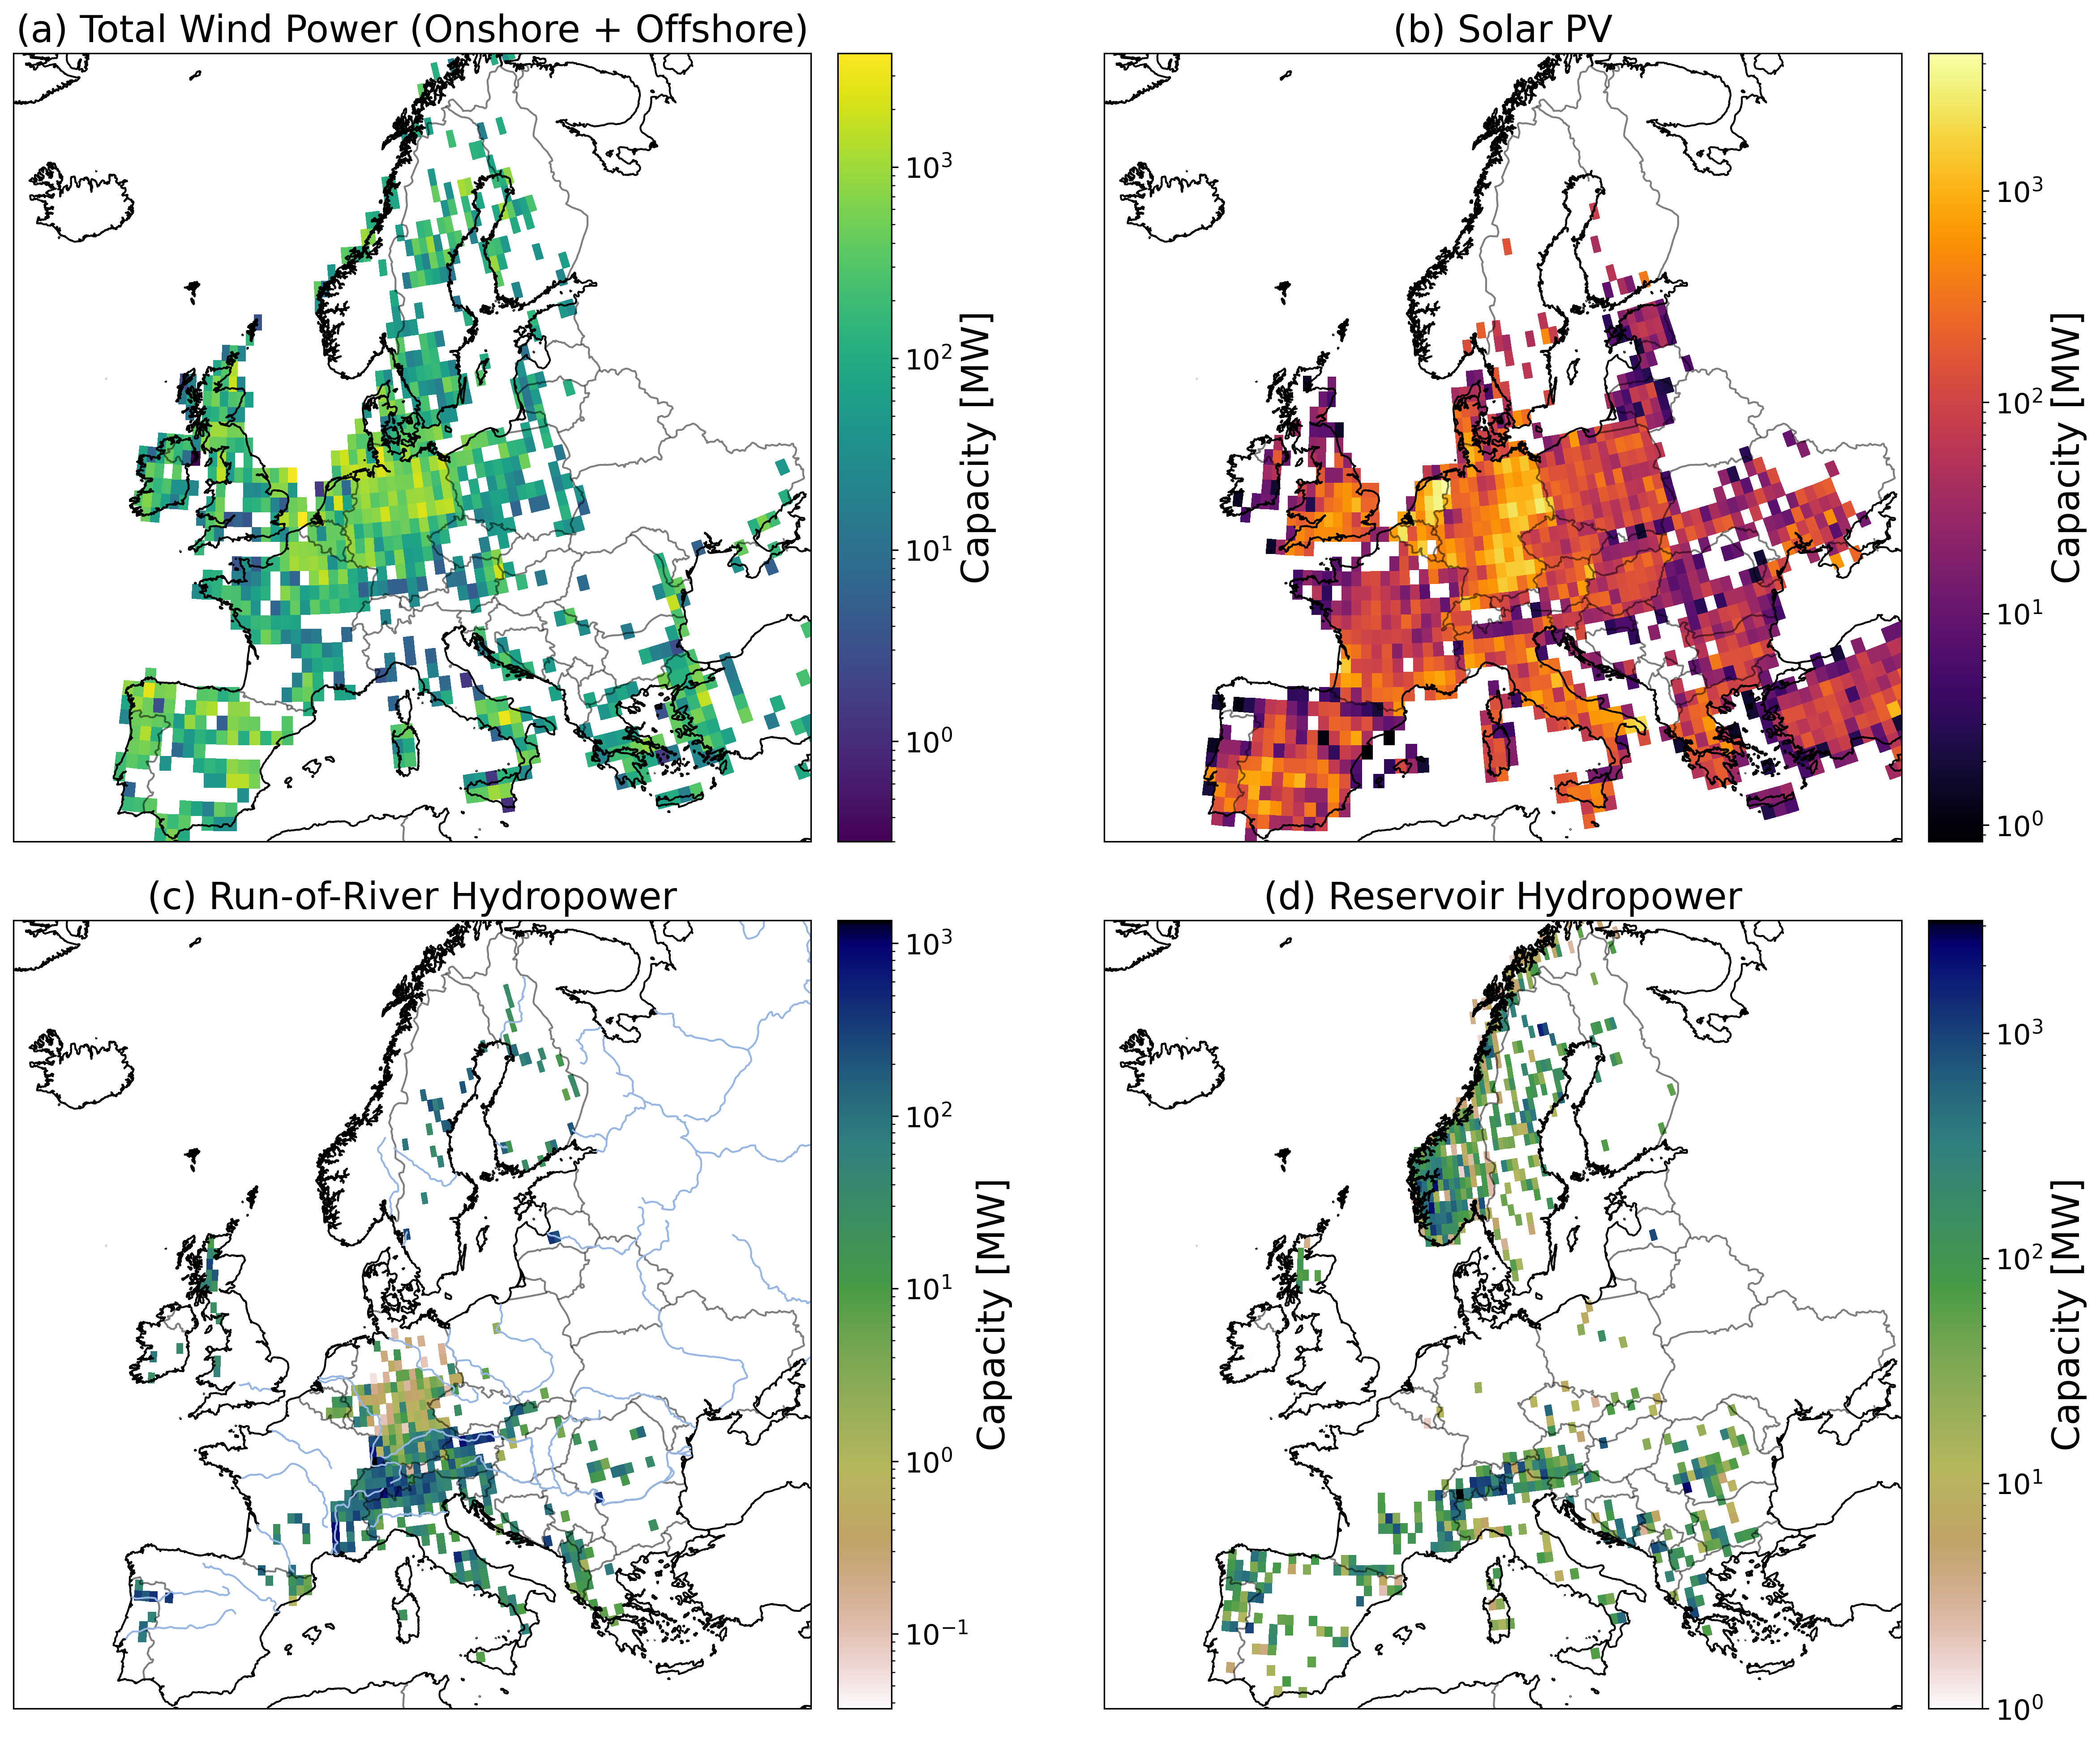

In [16]:
plots = [
    {'data': total_windCAP, 'capname': 'none', 'title': '(a) Total Wind Power (Onshore + Offshore)', 'cmap': 'viridis'},
    {'data': solar, 'capname': 'CAP', 'title': '(b) Solar PV', 'cmap': 'inferno'},
    {'data': ror, 'capname': 'capacity', 'title': '(c) Run-of-River Hydropower', 'cmap': 'gist_earth_r'},
    {'data': reservoir, 'capname': 'capacity', 'title': '(d) Reservoir Hydropower', 'cmap': 'gist_earth_r'}
]

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 16), dpi = 300,
                        #subplot_kw={'projection': ccrs.EuroPP()},
                        subplot_kw={'projection': ccrs.LambertConformal(0, 45)},
                        gridspec_kw={'hspace': 0.1, 'wspace': 0.1})

axs = axs.flatten()

for ax, plot_info in zip(axs, plots):
    data = plot_info['data']
    capname = plot_info['capname']
    title = plot_info['title']
    cmap = plot_info['cmap']
    
    ax.set_extent([-15, 33, 35, 70])
    # ax.gridlines()
    ax.coastlines(resolution='10m')
    ax.add_feature(cartopy.feature.BORDERS, linestyle='-', alpha=0.5)
    
    if plot_info['data'] is ror:
        ax.add_feature(cartopy.feature.RIVERS, linestyle='-')

    if capname == 'none':
        pcolormesh = ax.pcolormesh(data.lon, data.lat, data, transform=ccrs.PlateCarree(), cmap=cmap, norm=colors.LogNorm())
    else:
        pcolormesh = ax.pcolormesh(data.lon, data.lat, data[capname], transform=ccrs.PlateCarree(), cmap=cmap, norm=colors.LogNorm())
    
    ax.set_title(title, fontsize=20)
    cbar_ax = fig.add_axes([ax.get_position().x1 + 0.01, ax.get_position().y0, 0.02, ax.get_position().height])
    cbar = fig.colorbar(pcolormesh, cax=cbar_ax)#, label=f'{title} Capacity [MW]', fontsize = 16)
    cbar.set_label(f'Capacity [MW]', fontsize=20)  # Change the fontsize to your desired size
    cbar.ax.tick_params(labelsize=15)  # Adjust the tick size to your desired value

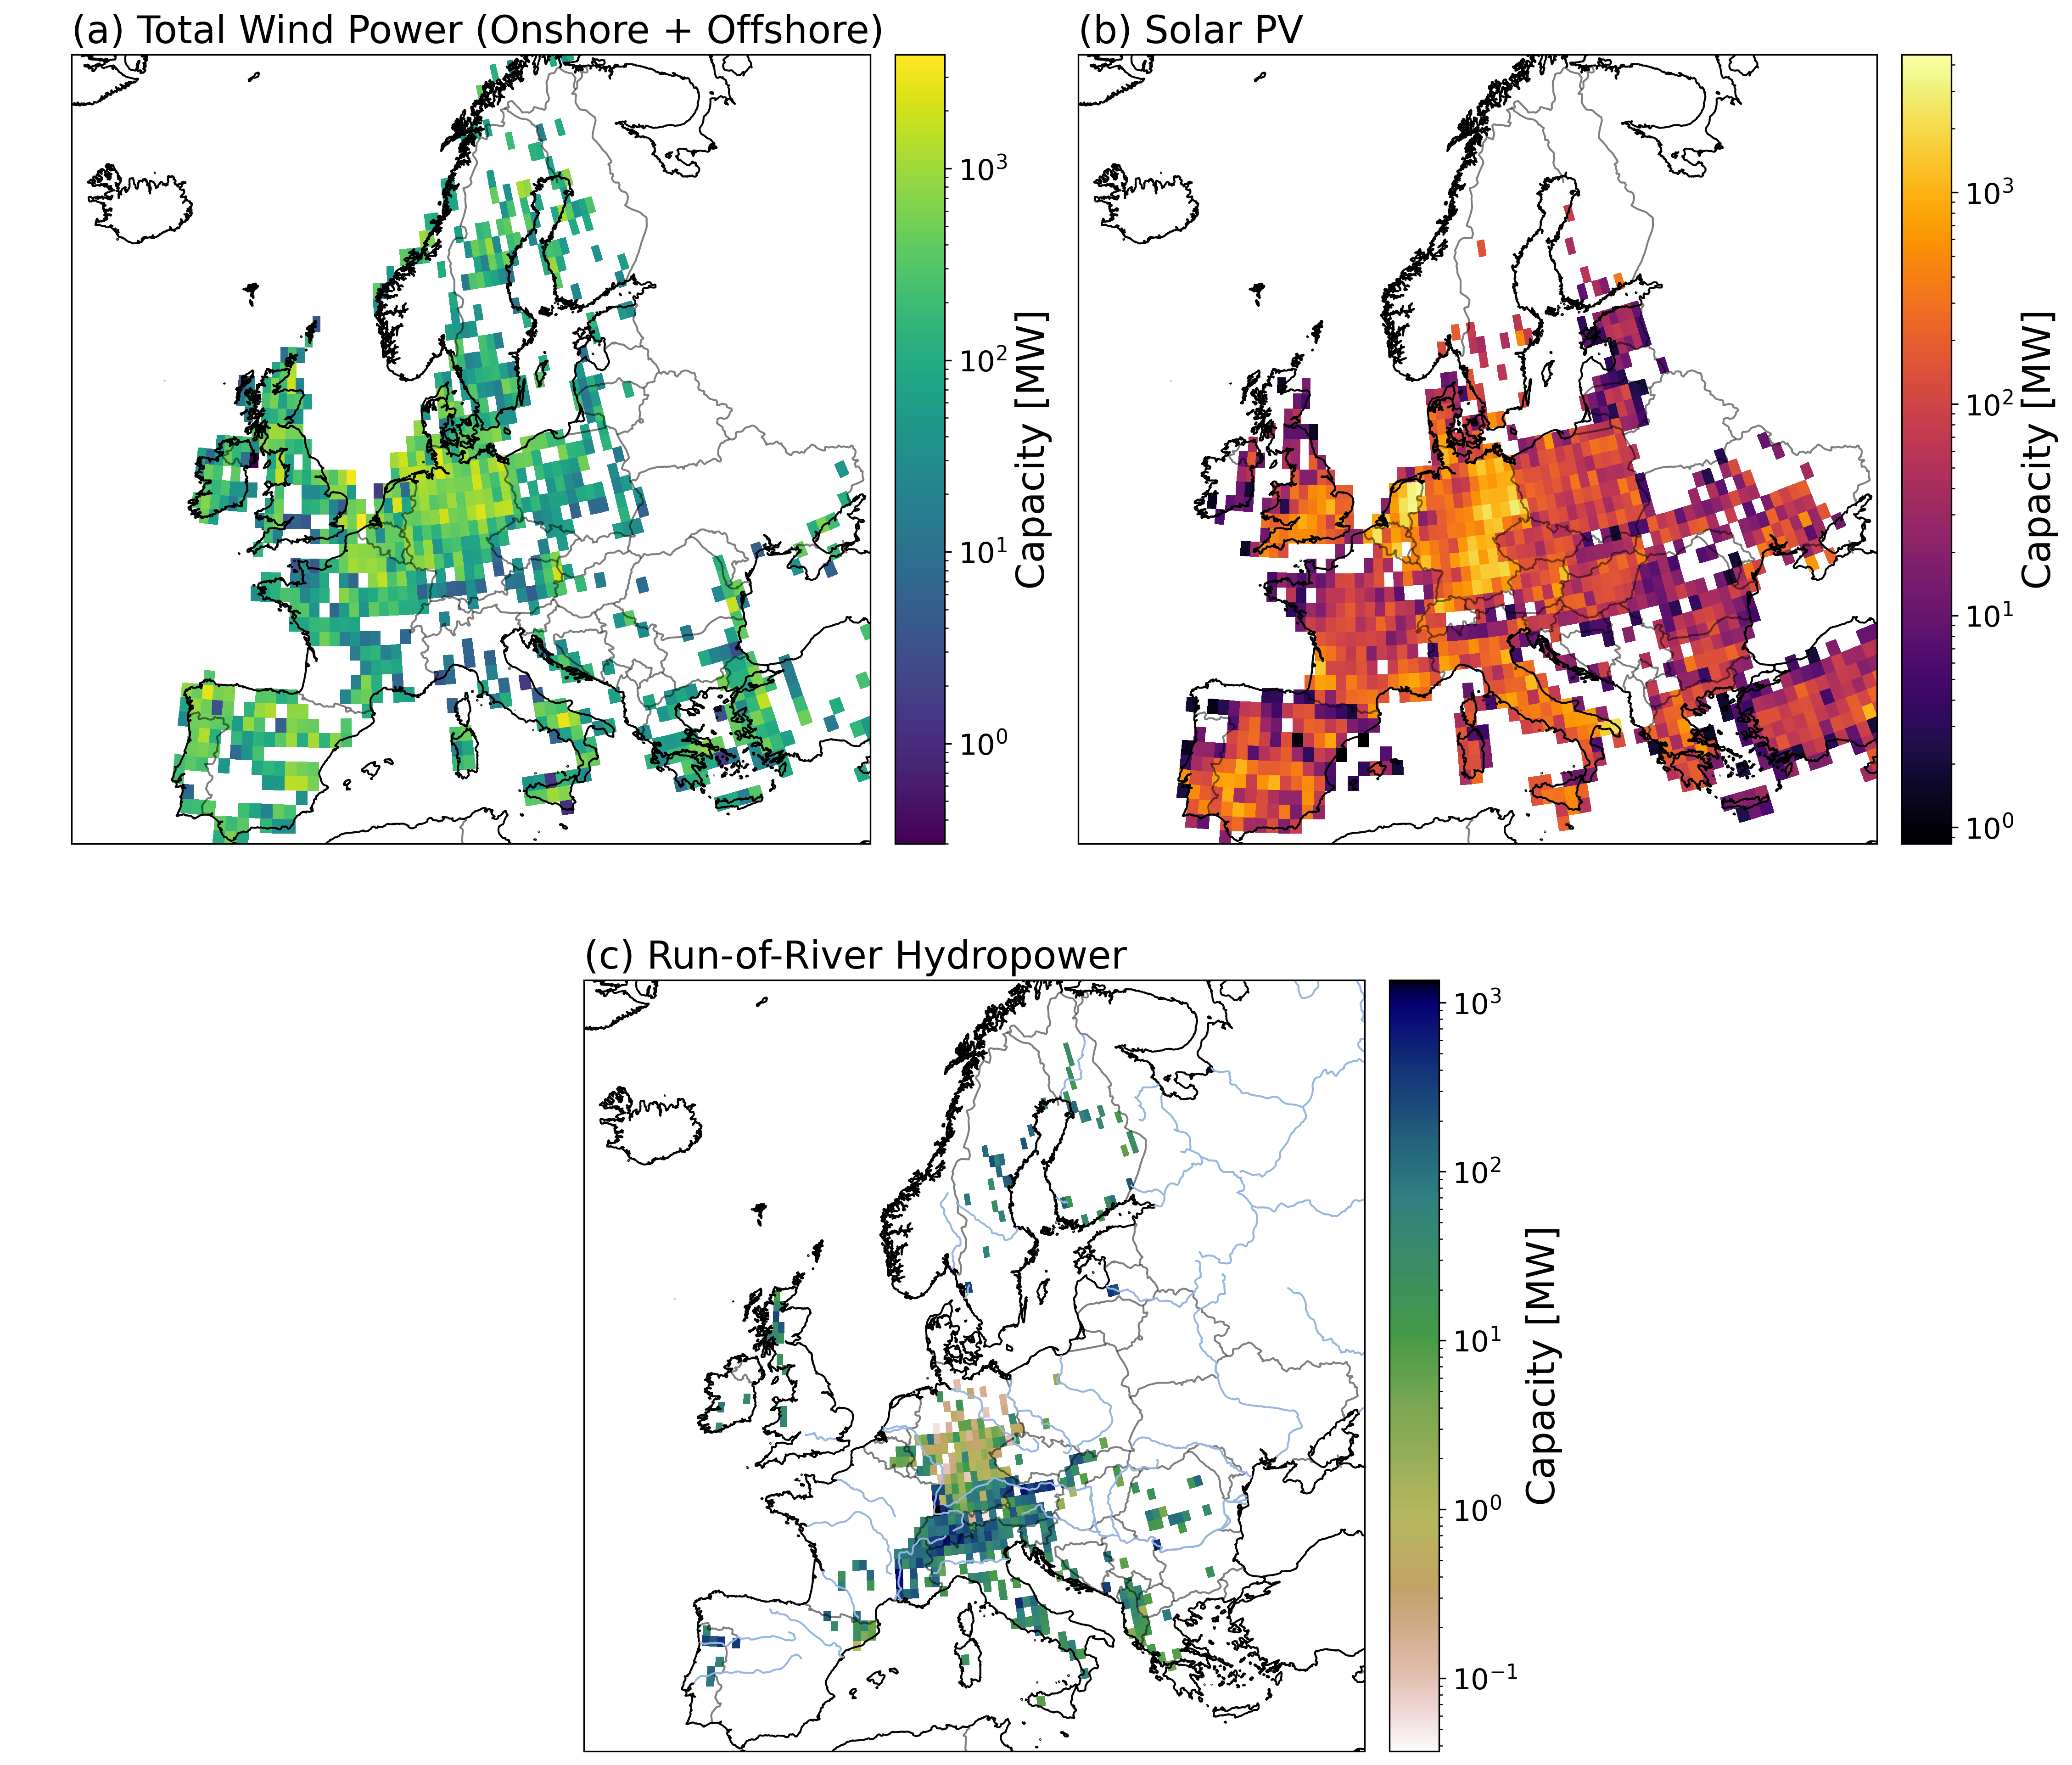

<Figure size 640x480 with 0 Axes>

In [20]:
# remake plots, don't show reservoir hydropower here.
# ugly coding, but it works
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(18, 16), dpi=300,
                        subplot_kw={'projection': ccrs.LambertConformal(central_longitude=0, central_latitude=45)},
                        gridspec_kw={'hspace': 0.15, 'wspace': 0.1})

axs = axs.flatten()

for i, (ax, plot_info) in enumerate(zip(axs, plots)):
    if i >= 2:  
        continue  
    
    data = plot_info['data']
    capname = plot_info['capname']
    title = plot_info['title']
    cmap = plot_info['cmap']
    
    ax.set_extent([-15, 33, 35, 70])
    ax.coastlines(resolution='10m')
    ax.add_feature(cartopy.feature.BORDERS, linestyle='-', alpha=0.5)
    
    if plot_info['data'] is ror:
        ax.add_feature(cartopy.feature.RIVERS, linestyle='-')
    
    if capname == 'none':
        pcolormesh = ax.pcolormesh(data.lon, data.lat, data, transform=ccrs.PlateCarree(), cmap=cmap, norm=colors.LogNorm())
    else:
        pcolormesh = ax.pcolormesh(data.lon, data.lat, data[capname], transform=ccrs.PlateCarree(), cmap=cmap, norm=colors.LogNorm())
    
    ax.set_title(title, fontsize=20, loc = "left")
    cbar_ax = fig.add_axes([ax.get_position().x1 + 0.01, ax.get_position().y0, 0.02, ax.get_position().height])
    cbar = fig.colorbar(pcolormesh, cax=cbar_ax)
    cbar.set_label(f'Capacity [MW]', fontsize=20)
    cbar.ax.tick_params(labelsize=15)

#seperately plot the last plot, to center it over the last row
bottom_ax = fig.add_subplot(2, 1, 2, projection=ccrs.LambertConformal(central_longitude=0, central_latitude=45))

plot_info = plots[2]
data = plot_info['data']
capname = plot_info['capname']
title = plot_info['title']
cmap = plot_info['cmap']

bottom_ax.set_extent([-15, 33, 35, 70])
bottom_ax.coastlines(resolution='10m')
bottom_ax.add_feature(cartopy.feature.BORDERS, linestyle='-', alpha=0.5)

if plot_info['data'] is ror:
    bottom_ax.add_feature(cartopy.feature.RIVERS, linestyle='-')

if capname == 'none':
    pcolormesh = bottom_ax.pcolormesh(data.lon, data.lat, data, transform=ccrs.PlateCarree(), cmap=cmap, norm=colors.LogNorm())
else:
    pcolormesh = bottom_ax.pcolormesh(data.lon, data.lat, data[capname], transform=ccrs.PlateCarree(), cmap=cmap, norm=colors.LogNorm())

bottom_ax.set_title(title, fontsize=20, loc = "left")
cbar_ax = fig.add_axes([bottom_ax.get_position().x1 + 0.01, bottom_ax.get_position().y0, 0.02, bottom_ax.get_position().height])
cbar = fig.colorbar(pcolormesh, cax=cbar_ax)
cbar.set_label(f'Capacity [MW]', fontsize=20)
cbar.ax.tick_params(labelsize=15)

# Hide the unused subplot (bottom left)
axs[3].axis('off')
axs[2].axis('off')
plt.show()
plt.tight_layout()
